In [14]:
import os
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

import torch

In [15]:
data_dir = "chest_xray"

train_dir = os.path.join(data_dir, "train")
test_dir = os.path.join(data_dir, "test")

len(glob(f"{train_dir}/*/*")), len(glob(f"{test_dir}/*/*"))

(5216, 640)

In [16]:
glob(f"{train_dir}/*/*")[-16:]

['chest_xray/train/PNEUMONIA/person661_bacteria_2553.jpeg',
 'chest_xray/train/PNEUMONIA/person1310_bacteria_3297.jpeg',
 'chest_xray/train/PNEUMONIA/person1214_bacteria_3166.jpeg',
 'chest_xray/train/PNEUMONIA/person491_bacteria_2082.jpeg',
 'chest_xray/train/PNEUMONIA/person55_bacteria_266.jpeg',
 'chest_xray/train/PNEUMONIA/person1507_bacteria_3948.jpeg',
 'chest_xray/train/PNEUMONIA/person294_bacteria_1388.jpeg',
 'chest_xray/train/PNEUMONIA/person1555_bacteria_4059.jpeg',
 'chest_xray/train/PNEUMONIA/person1239_virus_2099.jpeg',
 'chest_xray/train/PNEUMONIA/person1005_bacteria_2936.jpeg',
 'chest_xray/train/PNEUMONIA/person770_bacteria_2674.jpeg',
 'chest_xray/train/PNEUMONIA/person267_bacteria_1252.jpeg',
 'chest_xray/train/PNEUMONIA/person1308_virus_2252.jpeg',
 'chest_xray/train/PNEUMONIA/person51_bacteria_241.jpeg',
 'chest_xray/train/PNEUMONIA/person372_virus_755.jpeg',
 'chest_xray/train/PNEUMONIA/person1041_virus_1736.jpeg']

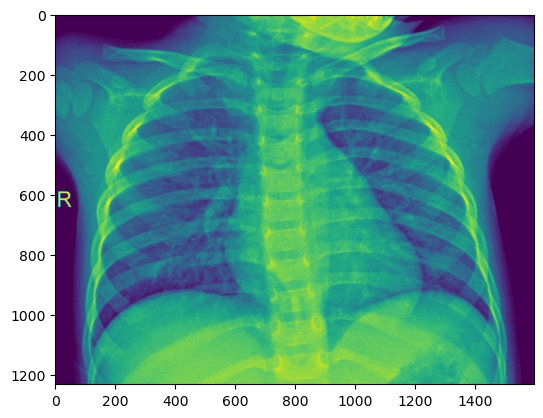

In [17]:
plt.imshow(plt.imread(glob(f"{train_dir}/*/*")[0]))

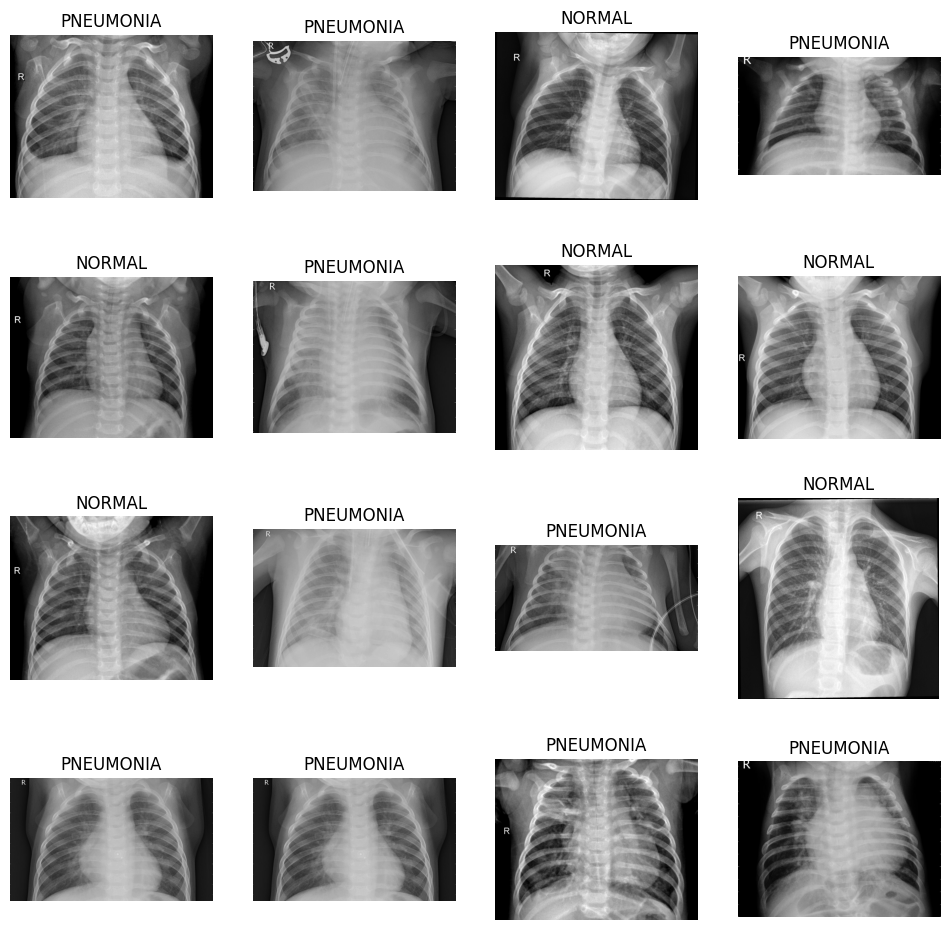

In [20]:
import random

plt.figure(figsize=(12, 12))
for i in range(16):
    path = random.choice(glob(f"{train_dir}/*/*"))
    img = plt.imread(path)
    plt.subplot(4, 4, i + 1)
    plt.title(path.split("/")[-2])
    plt.imshow(img, cmap="gray")
    plt.axis("off")
plt.show()

# 이미지 파일 읽어오는 법

## Torch
jpeg 이미지는 `torch.tensor`로 변환되어야 합니다.

### 옵션 1. torchvision.image -> torch.tensor

In [42]:
import torchvision

torchvision_image = torchvision.io.read_image(glob(f"{train_dir}/*/*")[0])
print(type(torchvision_image), torchvision_image.shape)

<class 'torch.Tensor'> torch.Size([1, 712, 1024])


### 옵션 2. numpy array -> torch.tensor

In [46]:
import cv2

cv2_image = cv2.imread(glob(f"{train_dir}/*/*")[0])

print(type(cv2_image), cv2_image.shape)

<class 'numpy.ndarray'> (712, 1024, 3)


In [47]:
cv2_image = torch.from_numpy(cv2_image)
# 또는
# cv2_image = torch.tensor(cv2_image)

print(type(cv2_image), cv2_image.shape) # shape을 CHW로 변경 필요

<class 'torch.Tensor'> torch.Size([712, 1024, 3])


### 옵션 3. torchvision으로 PIL, np ndarray -> torch.tensor 변환

`torchvision.transforms.ToTensor()`를 사용

In [28]:
from PIL import Image

pil_image = Image.open(glob(f"{train_dir}/*/*")[0]).convert("RGB")

print(type(pil_image), pil_image.size)

<class 'PIL.Image.Image'> (1024, 712)


In [41]:
cv2_image = cv2.imread(glob(f"{train_dir}/*/*")[0])

print(type(cv2_image), cv2_image.shape)

<class 'numpy.ndarray'> (712, 1024, 3)


In [43]:
totensor = torchvision.transforms.ToTensor()

pil_image = totensor(pil_image)

print(type(pil_image), pil_image.shape)

<class 'torch.Tensor'> torch.Size([3, 712, 1024])


In [44]:
cv2_image = totensor(cv2_image)

print(type(cv2_image), cv2_image.shape)

<class 'torch.Tensor'> torch.Size([3, 712, 1024])


## Keras
Keras는 `numpy array`, `tf.Tensor`로 변환되어야 합니다.

### 옵션 1. `load_img`, `img_to_array` 사용

In [48]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

keras_img = img_to_array(load_img(glob(f"{train_dir}/*/*")[0]))

print(type(keras_img), keras_img.shape)

<class 'numpy.ndarray'> (712, 1024, 3)


### 옵션 2. numpy array -> tf.Tensor

In [50]:
tf_image = tf.convert_to_tensor(keras_img)

print(type(tf_image), tf_image.shape)

<class 'tensorflow.python.framework.ops.EagerTensor'> (712, 1024, 3)


### 옵션 3. `tf.io.decode_image()`

In [49]:
import tensorflow as tf

tf_image = tf.io.decode_image(tf.io.read_file(glob(f"{train_dir}/*/*")[0]))

print(type(tf_image), tf_image.shape)

<class 'tensorflow.python.framework.ops.EagerTensor'> (712, 1024, 1)
